In [27]:
%matplotlib inline 

#Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

import math
from numpy import linalg as la
import numpy.matlib

### Lab 02: Clustering - <span style="color:#4ea373"> **Graded** </span>





#### Instructions

<div class="alert alert-block alert-success">

* You can achieve up to **20 points** for this graded notebook. The points for each task are clearly declared in the task descriptions. Fill in the missing code fragments and answer questions whenever you see this symbol: &#x1F536;. Please do not change any of the provided code.

* Team work is not allowed! Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not. 

* If you use any code fragments found on the internet, make sure you reference them properly.

* The responsible TA for this lab is Emilia, if you have further questions please reach out to her directly: emilia.arens@uzh.ch.

* Since the lab sessions are specifically designed to answer your questions please make sure to attend those and only reach out if further questions pop up later.

* Hand in your solution via OLAT until **10.04.2025**</span>. Make sure that all cells are execute as we will not rerun any code. Any cell that is not executed will automatically result in 0 points for this task. 
</div>




#### Task Overview

------------------------------------------------------------------------------------------
**Clustering**
1. **Exploring K-Means** <span style="color:#4ea373">**[2pt]**</span>

    1.1. Load Data <span style="color:#4ea373">[0pt]</span>

    1.2. Apply K-Means <span style="color:#4ea373">[1pt]</span>

    1.3. Adapt the Hyperparameters <span style="color:#4ea373">[0.5pt]</span>

    1.4. Apply K-Means to the Spiral Dataset <span style="color:#4ea373">[0.5pt]</span>

2. **Mean Shift** <span style="color:#4ea373">**[3pt]**</span>

    2.1. Apply Mean Shift to both datasets <span style="color:#4ea373">[1pt]</span>

    2.2. Find a Solution for the Spiral Dataset <span style="color:#4ea373">[2pt]</span>

3. **Qualitative Performance Evaluation** <span style="color:#4ea373">**[3pt]**</span>

    3.1. Explore the Dataset  <span style="color:#4ea373">[0.5pt]</span>

    3.2. Fit K-Means  <span style="color:#4ea373">[1pt]</span>

    3.3. Plot True Label Distribution <span style="color:#4ea373">[1pt]</span>

    3.4. Fit Mean Shift  <span style="color:#4ea373">[0.5pt]</span>

4. **Quantitative Performance Evaluation** <span style="color:#4ea373">**[3pt]**</span>
    
    4.1. Prepare the Dataset  <span style="color:#4ea373">[1pt]</span>
    
    4.2. Implement the Metric Functions  <span style="color:#4ea373">[2pt]</span>

5. **Implement Mean Shift** <span style="color:#4ea373">**[3pt]**</span>


6. **Report on Data Bias** <span style="color:#4ea373">**[6pt]**</span>







#### Clustering

**Task Description**
In this exercise we will use unsupervised methods for clustering. Instead of having $X$ and $Y$ pairs at train time, we only have the input data $X$ at train time and no access to the labels.
We wil explore two popular methods: K-means and Mean-shift.

## Datasets
To get familiar with clustering methods and their limitations, we will use 3 different datasets:

1. Toy data (2-dimensional blob data that is easy to visualize) for warm up.

2. 2D spiral data

3. Forest dataset from the classification lab.

4. Iris plant classification dataset. It contains 3 classes (Iris Setosa, Iris Versicolour, Iris Virginica) and 4 parameters (sepal length, sepal width, petal length, petal width all in cm)


#### 1. Exploring K - Means <span style="color:#4ea373">[2pt]</span>

Let's start with a simple example to gain better understanding of K-Means.

1.1 Load the toy data <span style="color:#4ea373">[0pt]</span>


In [28]:
toy = np.genfromtxt("/Users/merterol/Desktop/iMac27_github/uzh/Computational Science/Sem 4/PHY371/Exercise 1/data/toy_data.csv", delimiter=',') # 🔶 Insert the correct path to the dataset
#toy = np.genfromtxt("/Users/merterol/Desktop/VSCode/uzh/Computational Science/Sem 4/PHY371/data/toy_data.csv", delimiter=',') # 🔶 Insert the correct path to the dataset

1.2. Apply K - Means <span style="color:#4ea373">[1pt]</span>

Use sklearn to apply K-Means to the toy data. Once the model converged, plot the outcome. Points ending up in the same cluster should have the same color. Hint: use `plt.scatter()`

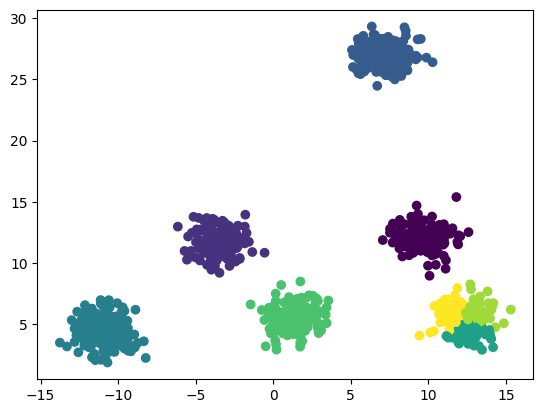

In [29]:
# 🔶 Fit a K-Means model
k_means = KMeans(random_state=42)
k_means.fit(toy)

# 🔶 Plot the results
plt.scatter(toy[:, 0], toy[:, 1], c=k_means.labels_)
plt.show()


1.3 Adapt the hyperparameters <span style="color:#4ea373">[0.5pt]</span>

Choosing the number of n_clusters without extra information is not trivial. For these blobs data, we don't have any labels. Which configurations do you think are be the best for this dataset? How many n_custers would you choose?

Plot your results.

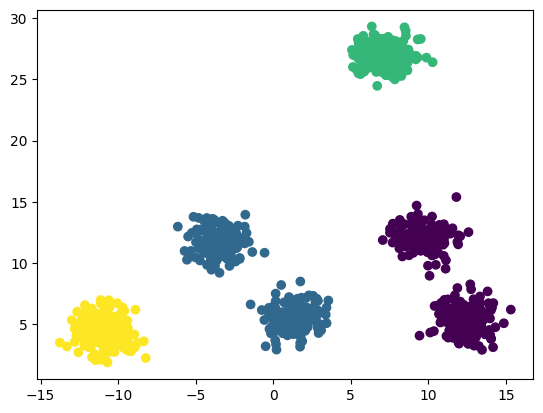

In [30]:
# 🔶 Fit a K-Means model and plot the result
k_means = KMeans(random_state=42, n_clusters=4)
k_means.fit(toy)

# 🔶 Plot the results
plt.scatter(toy[:, 0], toy[:, 1], c=k_means.labels_)
plt.show()

1.4. Apply KMeans to cluster the Spiral dataset. <span style="color:#4ea373">[0.5pt]</span>

In [31]:
# 🔶 Load the spiral data and fit K-Means
spiral = np.load('/Users/merterol/Desktop/iMac27_github/uzh/Computational Science/Sem 4/PHY371/Exercise 1/data/spiral.npz') #home
#piral = np.load('/Users/merterol/Desktop/VSCode/uzh/Computational Science/Sem 4/PHY371/data/spiral.npz') #work

spiral.files

x_cords = spiral["x"]
y_cords = spiral["y"]

print(x_cords.shape)
print(y_cords.shape)


(312, 2)
(312,)


      x1     x2  label
0  1.720  1.195    2.0
1  1.160  1.525    1.0
2  0.865  1.930    3.0
3  2.320  3.045    1.0
4  3.125  2.130    1.0


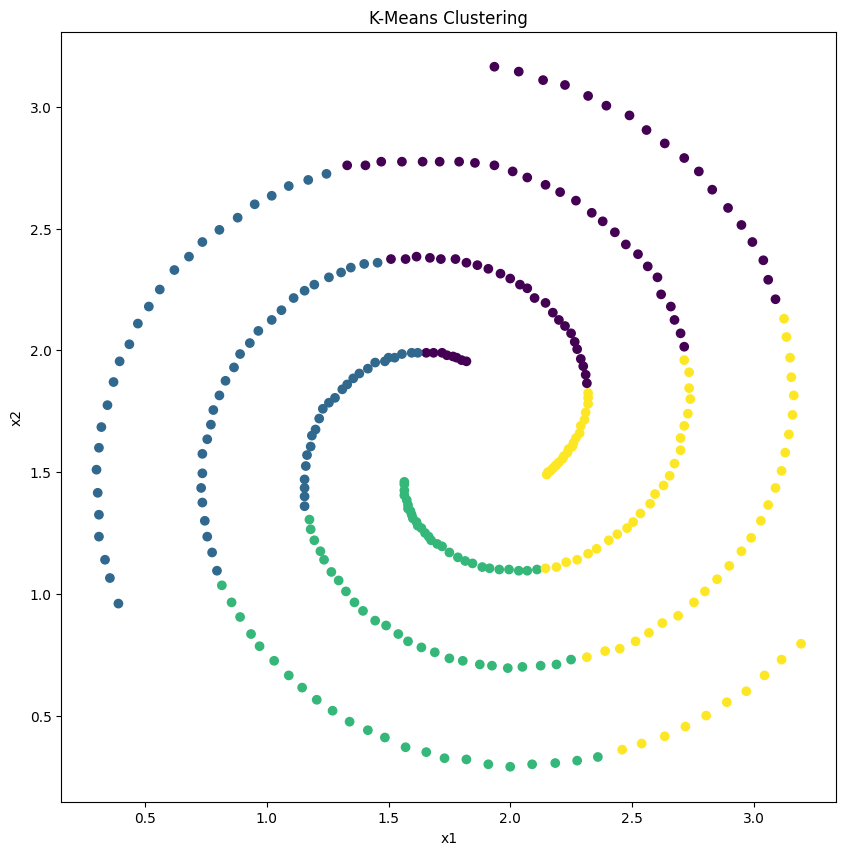

In [32]:
df_spiral = pd.DataFrame({
    'x1': x_cords[:, 0],
    'x2': x_cords[:, 1],
    'label': y_cords
})

print(df_spiral.head())

kmeans_spiral = KMeans(n_clusters=4, random_state=42)
kmeans_spiral.fit(df_spiral[['x1', 'x2']])
plt.figure(figsize=(10, 10))
plt.scatter(df_spiral["x1"], df_spiral['x2'], c=kmeans_spiral.labels_)
plt.title('K-Means Clustering')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


Which conclusions can be drawn from the output? Comment on 

- required assumptions for applying K-Means
- limitations of K-Means

Can you find a K-Means solution for this dataset? Write down your ideas here.

&#x1F536; **Your Answer**:

- required assumptions for applying K-Means: spherical clusters, similar cluster size, equal variance
- limitations of K-Means: sensitive to outliers, fixed number of clusters, fails with non-spherical clustres

Maybe use a kernel function, use DBSCAN, do eigenvalue decomp

#### 2. Mean Shift <span style="color:#4ea373">[3pt]</span>

Now, explore the mean shift algorithm for the same datasets. 

2.1. Apply the Mean Shift algorithm to both datasets (points and spiral) and plot the results next to each other. Choose suitable hyperparamters. <span style="color:#4ea373">[1pt]</span>


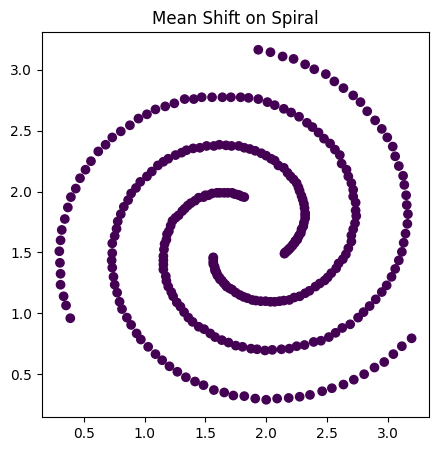

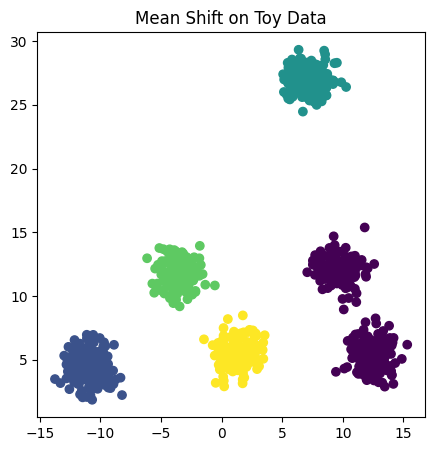

In [33]:
# 🔶 Cluster both sets and plot the results
from sklearn.cluster import estimate_bandwidth #found this online

X_spiral = df_spiral[['x1', 'x2']].values
X_toy = toy[['x1', 'x2']].values if isinstance(toy, pd.DataFrame) else toy


bandwidth_spiral = estimate_bandwidth(X_spiral, quantile=0.2, n_samples=100)
bandwidth_toy = estimate_bandwidth(X_toy, quantile=0.2, n_samples=100)

ms_spiral = MeanShift(bandwidth=bandwidth_spiral)
ms_toy = MeanShift(bandwidth=bandwidth_toy)

ms_spiral.fit(X_spiral)
ms_toy.fit(X_toy)

labels_spiral = ms_spiral.labels_
labels_toy = ms_toy.labels_

plt.figure(figsize=(5, 5))
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=labels_spiral)
plt.title('Mean Shift on Spiral')

plt.figure(figsize=(5, 5))
plt.scatter(X_toy[:, 0], X_toy[:, 1], c=labels_toy)
plt.title('Mean Shift on Toy Data')

plt.show()

Again, elaborate on the assumptions required for a successful application of the Mean Shift algorithm. 

&#x1F536; **Your Answer**:

clusters correspond to high density regions, no explicit assumptiom o custer shape, data is generated from a pdf

2.2 Find a solution for clustering the spiral dataset <span style="color:#4ea373">[2pt]</span>

Everything is allowed here (as long as you don't give the algorithm the solution). Keep your unsuccsessful ideas as well and try to keep your code as clean as possible.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_spectral.py:702: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


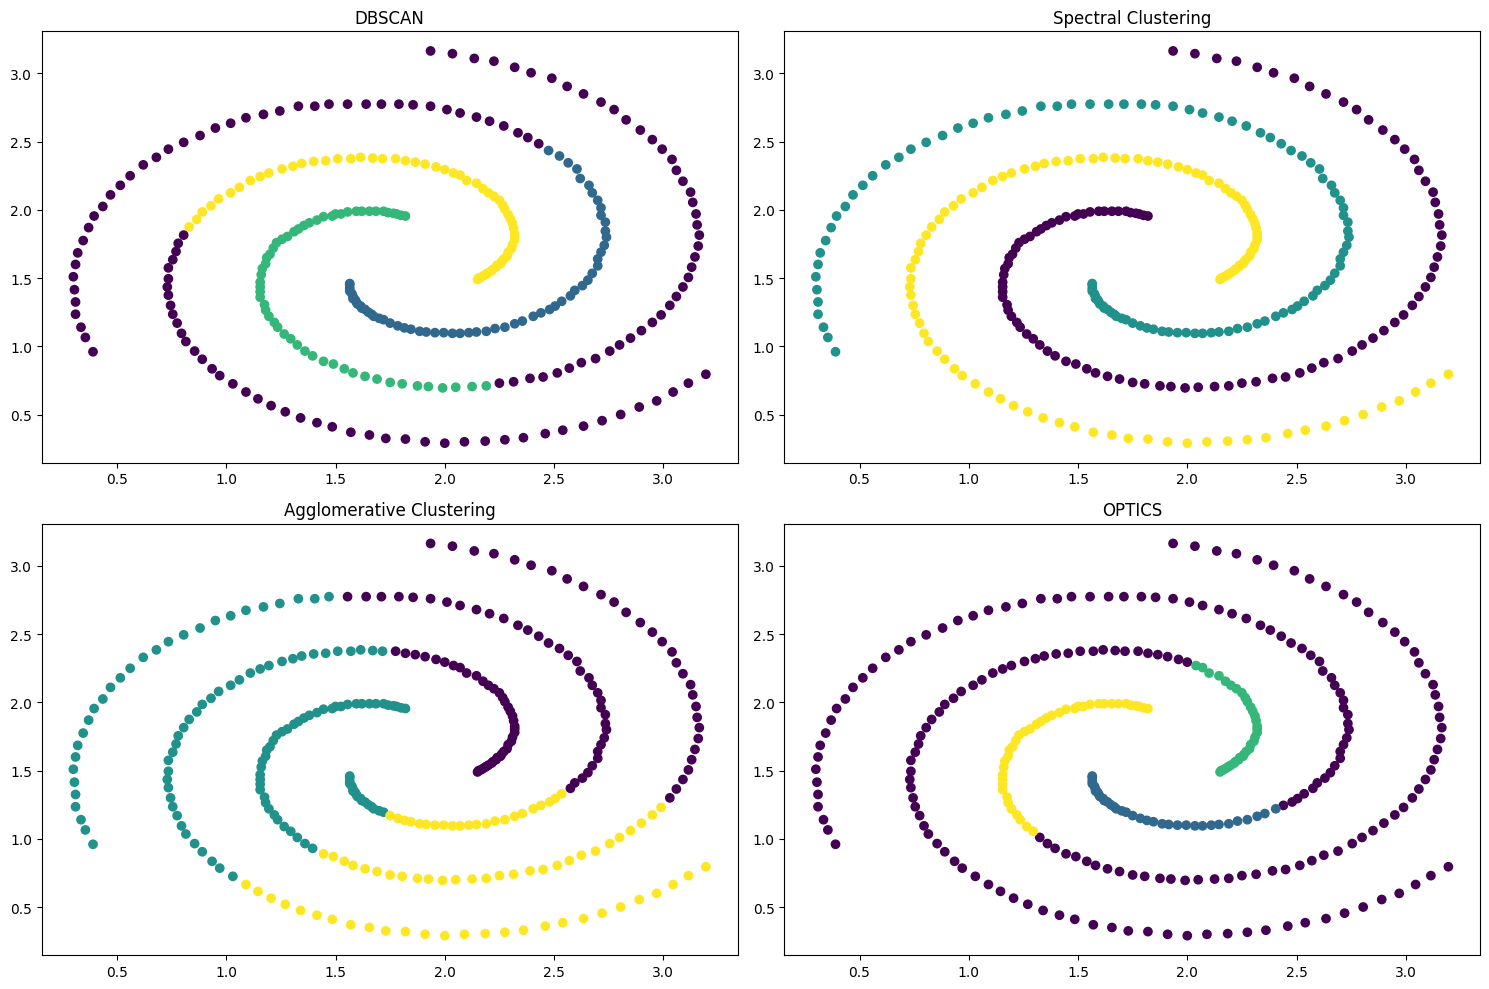

In [ ]:
# 🔶 Cluster the spiral dataset successfully and plot the result.
# k-means and meanshift fails as seen earlier

from sklearn.cluster import DBSCAN, SpectralClustering, AgglomerativeClustering, OPTICS
from sklearn.metrics.pairwise import rbf_kernel

dbscan = DBSCAN(eps=0.3, min_samples=10)
db_labels = dbscan.fit_predict(X_spiral)

affinity_matrix = rbf_kernel(X_spiral, gamma=1.0)
spectral = SpectralClustering(n_clusters=3, affinity='rbf', assign_labels='kmeans')
sp_labels = spectral.fit_predict(affinity_matrix)

agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
ag_labels = agglo.fit_predict(X_spiral)

optics = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.05)
op_labels = optics.fit_predict(X_spiral)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].scatter(X_spiral[:, 0], X_spiral[:, 1], c=db_labels)
axs[0, 0].set_title('DBSCAN')

axs[0, 1].scatter(X_spiral[:, 0], X_spiral[:, 1], c=sp_labels)
axs[0, 1].set_title('Spectral Clustering')

axs[1, 0].scatter(X_spiral[:, 0], X_spiral[:, 1], c=ag_labels)
axs[1, 0].set_title('Agglomerative Clustering')

axs[1, 1].scatter(X_spiral[:, 0], X_spiral[:, 1], c=op_labels)
axs[1, 1].set_title('OPTICS')

plt.tight_layout()
plt.show()


#### 3. Evaluating the Performance of Clustering Algorithms for a Classification Task <span style="color:#4ea373">**[3pt]**</span>

We want to explore how well clustering algorithms perform on a classification task. We will pretend that we do not have access to the labels for training the models and later use them for model evaluation.

In [35]:
# Load data
df_iris=pd.read_csv('/Users/merterol/Desktop/iMac27_github/uzh/Computational Science/Sem 4/PHY371/Exercise 1/data/iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']) # 🔶 Add correct path
#df_iris=pd.read_csv('/Users/merterol/Desktop/VSCode/uzh/Computational Science/Sem 4/PHY371/data/iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']) # 🔶 Add correct path

# Split data into training and test sets
iris_test = df_iris.sample(frac = 0.2, random_state=42) 
iris_train = df_iris.drop(iris_test.index)

3.1. Explore the Dataset <span style="color:#4ea373">[0.5pt]</span>

For each of the features, plot the value distribution as a histogram. Use a 2x2 grid for plotting 


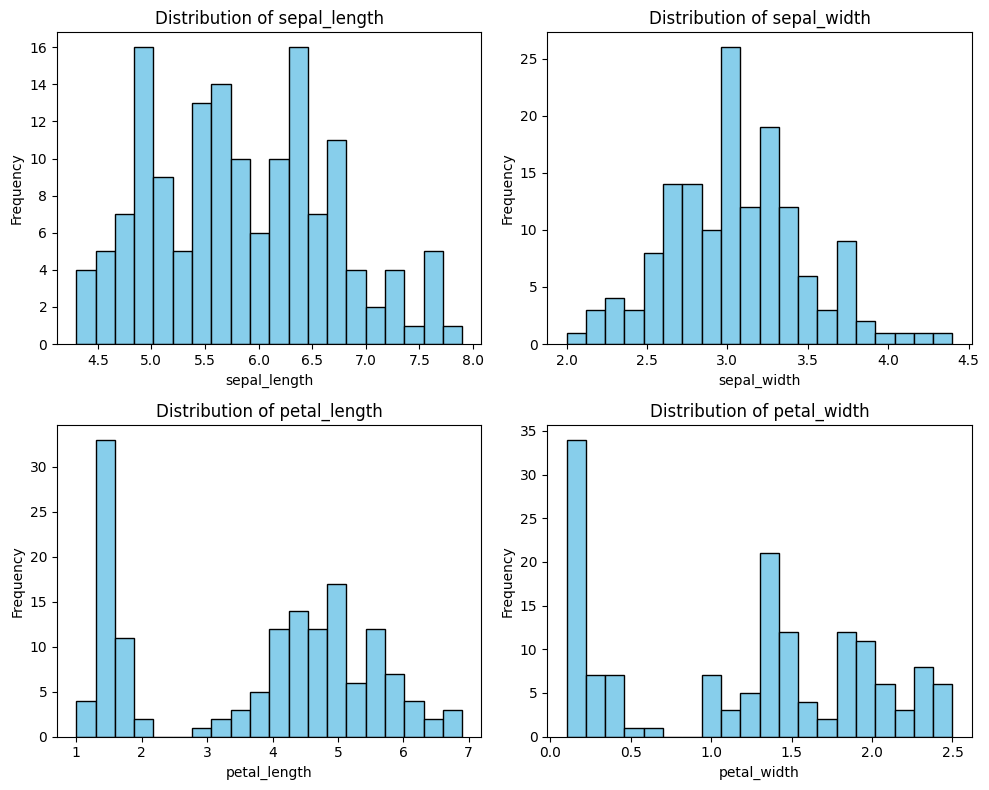

In [36]:
# 🔶 Plot feature distribution
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, feature in enumerate(features):
    ax = axes[i // 2, i % 2]
    ax.hist(df_iris[feature], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


3.2. Fit K-Means <span style="color:#4ea373">[1pt]</span>

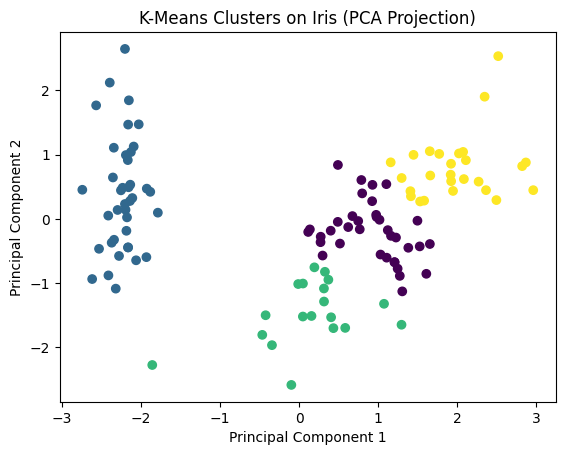

In [37]:
from sklearn.decomposition import PCA

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X_train = iris_train[features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_scaled)
cluster_labels = kmeans.labels_
iris_train['cluster'] = kmeans.labels_

# Used this in a different course and reused it here
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.figure()
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters on Iris (PCA Projection)')
plt.show()

What is the best number of clusters for this dataset?


&#x1F536; **Your Answer**:

After trying 1-6, I would say 4 is the best

3.3 Lets investigate the resulting clusters by looking at the true labels. <span style="color:#4ea373">[1pt]</span>

For each cluster, make a barplot indicating how many samples for each species ended up in this cluster. Always plot all three species even if they are zero.

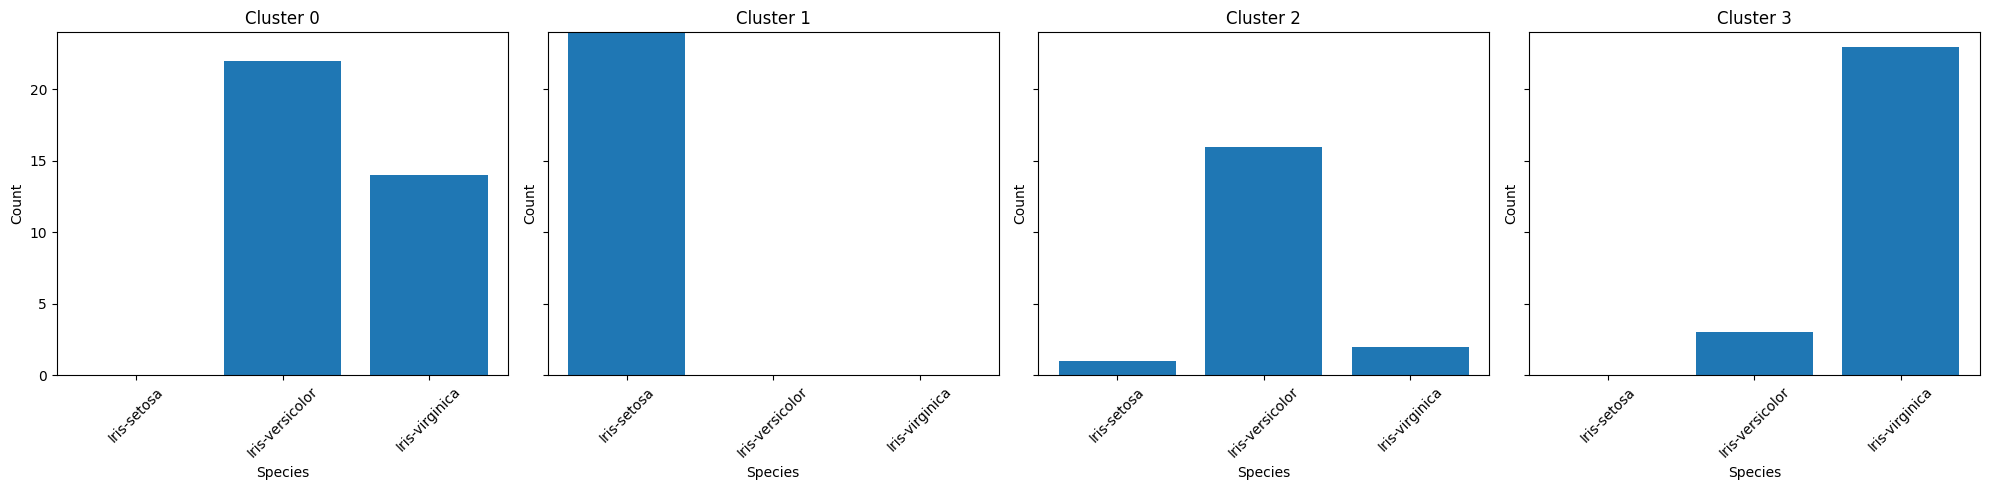

In [38]:
# 🔶 Plot
species_list = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

cluster_labels = sorted(iris_train['cluster'].unique())
n_clusters = len(cluster_labels)

fig, axes = plt.subplots(1, n_clusters, figsize=(5 * n_clusters, 5), sharey=True)

for i, cluster_id in enumerate(cluster_labels):
    cluster_data = iris_train[iris_train['cluster'] == cluster_id]

    counts = [sum(cluster_data['species'] == sp) for sp in species_list]

    axes[i].bar(species_list, counts)
    axes[i].set_title(f'Cluster {cluster_id}')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel('Count')
    axes[i].set_ylim([0, max(counts) + 1])  # so there's a little space above the highest bar
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


We also want to know how the clusters are distributed in the feature space. Make a 3D plot with the three features we picked on each of the axis and the cluster number as the color.

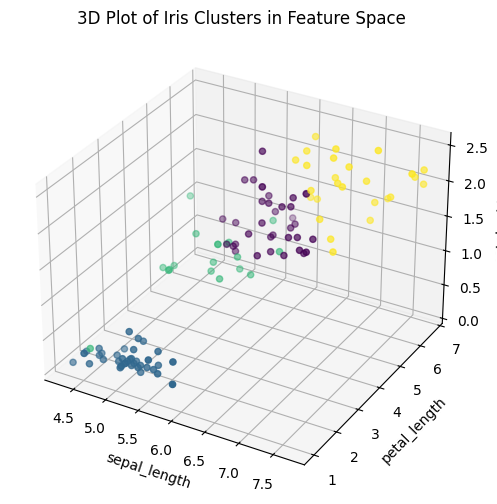

In [39]:
# 🔶 Define the 3D visualizing function and plot the result for our model
feature_x = 'sepal_length'
feature_y = 'petal_length'
feature_z = 'petal_width'

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    iris_train[feature_x],
    iris_train[feature_y],
    iris_train[feature_z],
    c=iris_train['cluster']
)

ax.set_xlabel(feature_x)
ax.set_ylabel(feature_y)
ax.set_zlabel(feature_z)

plt.title("3D Plot of Iris Clusters in Feature Space")
plt.show()

Comment on the two plots. Do you think the clustering algorithm did a good job in separating the classes?

&#x1F536; **Your Answer**:

I would argue that it could be worse. There are some singular points that are obviously in a wrong class but in general it worked pretty good.

3.4 Repeat the procedure for the Mean Shift Algorithm <span style="color:#4ea373">[0.5pt]</span>

In [40]:
# 🔶 Fit the data
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X_train = iris_train[features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

bw = estimate_bandwidth(X_train_scaled, quantile=0.2) 
mean_shift = MeanShift(bandwidth=bw)
mean_shift.fit(X_train_scaled)

ms_labels = mean_shift.labels_
iris_train['cluster'] = ms_labels

n_clusters = len(np.unique(ms_labels))
print(f"Mean Shift found {n_clusters} clusters.")

Mean Shift found 4 clusters.


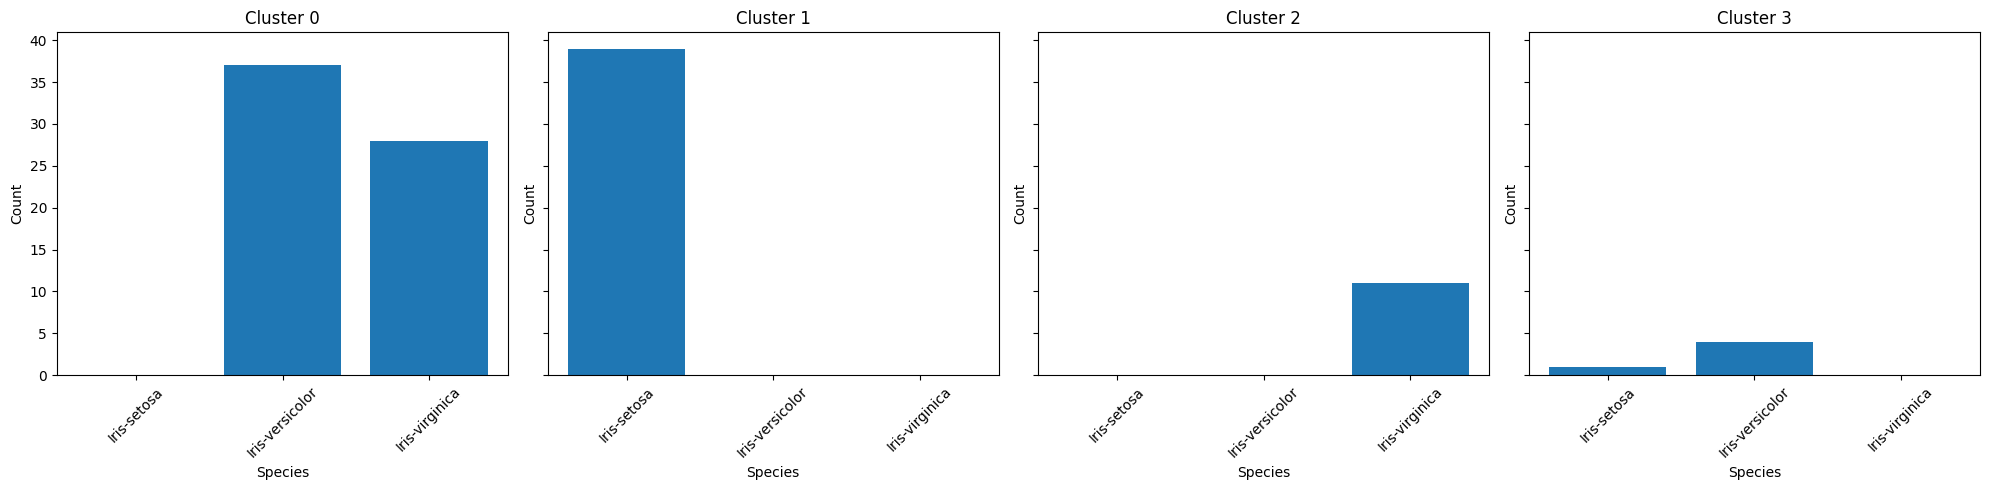

In [41]:
# 🔶 Barplot
species_list = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cluster_labels = sorted(iris_train['cluster'].unique())
n_clusters = len(cluster_labels)

fig, axes = plt.subplots(1, n_clusters, figsize=(5 * n_clusters, 5), sharey=True) #got help from copilot here to make it dynamic

for i, cluster_id in enumerate(cluster_labels):
    cluster_data = iris_train[iris_train['cluster'] == cluster_id]
    counts = [sum(cluster_data['species'] == sp) for sp in species_list]
    
    # Bar plot
    axes[i].bar(species_list, counts)
    axes[i].set_title(f'Cluster {cluster_id}')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Which outcome do you prefer? How did you pick the bandwidth for the Mean Shift algorithm?

&#x1F536; **Your Answer**:

In this case i like kmeans better. For the bandwidth i googled how to use MeanShift itself and that it suggested to use estimate_bandwidth. This calculates the bandwidth by looking at the pairwise distances among points in X_train_scaled. The quantile=0.2 parameter tells the function to find the distance value below which 20% of all pairwise distances fall and then use that as the basis for the bandwidth.

0.2 was suggested in the lookup i did

#### 4. Metric Based Evaluation <span style="color:#4ea373">**[3pt]**</span>


We now implement metrics which can help measure the performance of the algorithms. We will evaluate the performance on the remaining 50 samples.

4.1. Prepare the data splits and fit the models <span style="color:#4ea373">[1pt]</span>

In [42]:
# 🔶 Adapt the sets. We want to use all features now. Don't forget to rescale the data.
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

X_train = iris_train[features]
X_test = iris_test[features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)

mean_shift = MeanShift(bandwidth=bw)
mean_shift.fit(X_train_scaled)


MeanShift(bandwidth=1.21252190831692)

In [43]:
# 🔶 Fit K-means and Mean-Shift
y_kmeans_train = kmeans.labels_
y_kmeans_test = kmeans.predict(X_test_scaled)

y_meanshift_train = mean_shift.labels_
y_meanshift_test = mean_shift.predict(X_test_scaled)



4.2. Implement functions to find the majority label, the label coverage and the purity of the clusters. <span style="color:#4ea373">[2pt]</span>

In [44]:
def calculate_majority_label(cluster: pd.Series) -> str:

    if cluster.empty:
        return "None"
    return cluster.value_counts().idxmax()

def coverage(cluster: pd.Series, dataset: pd.Series) -> float:

    if cluster.empty:
        return 0.0
    majority_label = calculate_majority_label(cluster)
    num_in_cluster = (cluster == majority_label).sum()
    num_in_dataset = (dataset == majority_label).sum()

    if num_in_dataset == 0:
        return 0.0
    return num_in_cluster / num_in_dataset

def purity(cluster: pd.Series) -> float:

    if cluster.empty:
        return 0.0
    majority_label = calculate_majority_label(cluster)
    num_in_cluster = (cluster == majority_label).sum()
    return num_in_cluster / len(cluster)


In [45]:
# DO NOT CHANGE
print('KMEANS')
print()

clusters = np.unique(y_kmeans_train)
for i in clusters:
    print('Cluster: ', i)
    cluster = iris_test['species'][y_kmeans_test==i]
    print(f'Majority label:  {calculate_majority_label(cluster)},')
    print(f'Coverage: {coverage(cluster, iris_test["species"])*100}% ')
    print(f'Purity:{purity(cluster)*100}%')
    print()

print('MEAN SHIFT')
print()
clusters = np.unique(y_meanshift_train)
for i in clusters:
    print('Cluster: ', i)
    cluster = iris_test['species'][y_meanshift_test==i]
    print(f'Majority label:  {calculate_majority_label(cluster)},')
    print(f'Coverage: {coverage(cluster, iris_test["species"])*100}% ')
    print(f'Purity:{purity(cluster)*100}%')
    print()

KMEANS

Cluster:  0
Majority label:  Iris-virginica,
Coverage: 100.0% 
Purity:84.61538461538461%

Cluster:  1
Majority label:  Iris-setosa,
Coverage: 100.0% 
Purity:100.0%

Cluster:  2
Majority label:  Iris-versicolor,
Coverage: 77.77777777777779% 
Purity:100.0%

MEAN SHIFT

Cluster:  0
Majority label:  Iris-versicolor,
Coverage: 100.0% 
Purity:52.94117647058824%

Cluster:  1
Majority label:  Iris-setosa,
Coverage: 100.0% 
Purity:100.0%

Cluster:  2
Majority label:  Iris-virginica,
Coverage: 27.27272727272727% 
Purity:100.0%

Cluster:  3
Majority label:  None,
Coverage: 0.0% 
Purity:0.0%



Elaborate on the results:

- Did the metric confirm your intuition? 
- Why are metrics useful?
- Can they be missleading as well?
- When does the purity get less reliable? 
- When does the coverage get less reliable?

Hint: Does the size of the clusters effect the metrics?

&#x1F536; **Your Answer**:

1. Yes, the results generally align after inspecting the Iris data (e.g., Iris setosa tends to be well-separated from the other species in feature space)
2. They provide objective ways to measure the quality of clusters
3. Yes: A high purity cluster can be achived by placing each data point to its own cluster and a high coverage can be achieved by having a single cluster containing all instances
4. Purity can become less meaningful for small clusters. If a cluster has very few points (e.g., 2–3 points) and they all belong to the same class, you get 100% purity
5. Coverage can be misleading when a cluster is too large or dominates most of the data.

#### 5. Implementing Mean Shift <span style="color:#4ea373">[3pt]</span>

Let's implement mean-shift algorithm ourselves.

Complete the function ml_meanshift that performs the mean shift algorithm. The function takes 3 arguments:

- input data: sample points in a N-by-2 matrix (number of rows is the number of samples, dimensionality of the input data will always be 2 for this exercise)
- the kernel bandwidth $h$
- the stopping threshold $\vartheta$

It should return two values:

- cluster indexes: a column vector with N rows, specifying the cluster index for each sample
- cluster modes: a M-by-2 matrix, returning the cluster modes (the points with the highest density) for each cluster (where M is the number of clusters)

For this task, use the Epanechnikov kernel. Luckily all terms before the sum cancel out in the mean shift formula, leading to

$$
\mathbf{q}_{t+1} = \frac{
\sum_{i=1}^N \mathbf{x}_i
\max\left(0, 1 - \frac{|\mathbf{q}_t - \mathbf{x}i|^2}{h^2} \right)
} {
\sum_{i=1}^N
\max\left(0, 1 - \frac{|\mathbf{q}_t - \mathbf{x}_i|^2}{h^2} \right)
}
$$

Start the mean shift procedure at each point and iterate until $|\mathbf{q}_{t}-\mathbf{q}_{t-1}| < \vartheta$ where $\vartheta$ is the threshold passed to the function. Additionally also count the iterations and add it as condtion so the loop does not run infinitely. You can use $200$ as the maximum value of iteration.

When the iteration stopped, decide if a cluster mode already exists that is closer than $\frac{h}{5}$. If yes, assign the point that you started at to this cluster. Otherwise, create a new cluster and assign the point to the new cluster.

In [46]:
def ml_meanshift(data,h,theta):

    # 🔶 initialize modes
    modes = []
    # 🔶 initialize index variable for data points
    index = np.zeros(data.shape[0], dtype=int)
    # 🔶  s = num samples
    s = data.shape[0]

    for i in range(s):

        # 🔶 initialize query points 0 and 1
        q1 = data[i].copy()
        q0 = np.zeros_like(q1)

        # 🔶 initialize early stopping condition
        it = 0

        # 🔶 while the distance between the query points is greater than theta and the number of iterations is less than 200
        while it < 200 and np.linalg.norm(q1 - q0) > theta:
            
            
            # 🔶 update q0
            q0 = q1.copy()    
            # 🔶 compute q_t+1. Do not use any loops here (got help from copilot in this part)
            differences = data - q0
            squared_distances = np.sum(differences**2, axis=1)
            kernel_weights = np.maximum(0, 1 - squared_distances / h**2)
            
            numerator = np.sum(data * kernel_weights[:, np.newaxis], axis=0)
            denominator = np.sum(kernel_weights)
            
            if denominator > 0:
                q1 = numerator / denominator

            # 🔶 update iteration
            it = it + 1

        # check for clusters in the vicinity

        # 🔶 if there are modes, check if the query point is close to any of them
        
        # 🔶 if there are modes and the query point is close to any of them, assign the index of the closest mode to the index variable
        
        # 🔶 if there are no modes or the query point is not close to any of them, add the query point to the modes
        
        if len(modes) > 0:
            modes_array = np.array(modes)
            mode_distances = np.sqrt(np.sum((modes_array - q1)**2, axis=1))
            closest_mode_index = np.argmin(mode_distances)
            min_distance = mode_distances[closest_mode_index]
            
            if min_distance < h/2:
                index[i] = closest_mode_index
            else:
                modes.append(q1)
                index[i] = len(modes) - 1
        else:
            modes.append(q1)
            index[i] = 0
        


    return index, modes

In [47]:
def visualise_kmeans(data,idx,centers,updated=None):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(data[:,0],data[:,1],marker='.', c=idx)
    ax.plot(centers[:,0],centers[:,1],'+',color='r',markersize=15,mew=2)
    plt.show()
    
def test_meanshift():
    data = np.genfromtxt("/Users/merterol/Desktop/iMac27_github/uzh/Computational Science/Sem 4/PHY371/Exercise 1/data/toy_data.csv", delimiter=',') # 🔶 Add the correct path
    idx, centers = ml_meanshift(data,4,0.001)
    
    centers_2 = np.array(centers)
    
    visualise_kmeans(data=data,idx=idx,centers=centers_2)

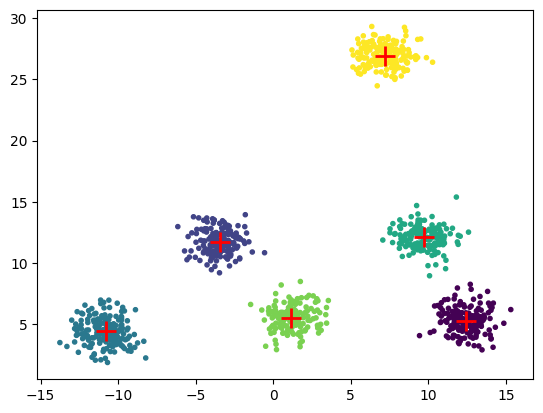

In [48]:
# test and visualise your results
test_meanshift()

#### 6. Data Bias <span style="color:#4ea373">[6pt]</span>

With the increased use of AI in the public sphere, problems resulting from data biases gain in influence. Therefore, it is immensely important to be aware of different types of biases, their impact on model outcomes and potential mitigation strategies. Please do a little research excursion and use your findings to answer the following questions. Report your sources!

1. What types of data biases are reported in the literature.

2. How does each of the biases impact the integration of AI in our daily lives? Which ethical concerns come to your mind?

3. Which biases are especially pronounced in your field of expertise? How do they shape the research?

4. Explore two mitigation strategies on the model side. 



&#x1F536; **Your Answer**:

- https://www.datacamp.com/blog/data-demystified-the-different-types-of-ai-bias
- https://ijrar.org/papers/IJRAR24A3208.pdf
- https://onix-systems.com/blog/ai-bias-detection-and-mitigation
- https://www.statology.org/5-types-of-data-bias-and-how-to-address-them/
- https://www.psychologytoday.com/us/blog/misinformation-desk/202106/the-bias-experts

1. 
    - prejudice bias (when the training data reflects existing prejudices, stereotypes, and societal assumptions, these biases get embedded in the learned model)
    - sample selection bias (occurs when the training data is not representative of the population under study)
    - measurement bias (comes from an error in the data collection or measurement process. For example, if images from a camera used in supplying data for an image recognition system are of poor quality, this could lead to biased results against specific populations)
2. 
    - Can lead to AI systems that do not perform well for underrepresented groups, affecting areas like healthcare and finance
    - May result in AI reinforcing existing stereotypes
    - AI systems continue to reflect and reinforce past inequalities
3. 
    - (My field is CL, AI, ML, NLP) These biases shape research by highlighting the need for diverse and representative datasets, as well as the importance of fairness and transparency in AI model development
4. 
    - Fairness Audits (Regularly auditing AI systems for bias can help identify and correct discriminatory patterns early on)
    - Diverse Data Sets (Ensuring that AI systems are trained on diverse and representative data sets helps reduce the likelihood of biased outcomes)